# Neural Network from Scratch
**Author :** Vyomkesh Vyas  
**Date Created :** 9th July 2025

This notebook depicts a simple example of neural network from scratch for character recognition using numpy library.

**Step 1:** Import the required libraries.

In [2]:
# Importing necessary libraries for the neural network implementation.
import numpy as np
import matplotlib.pyplot as plt

**Step 2:** Generate synthetic binary data of characters A, B and C for classification.

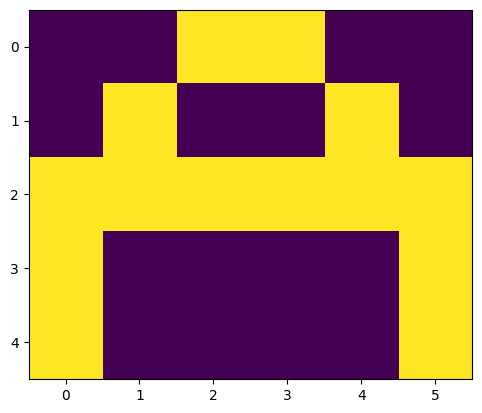

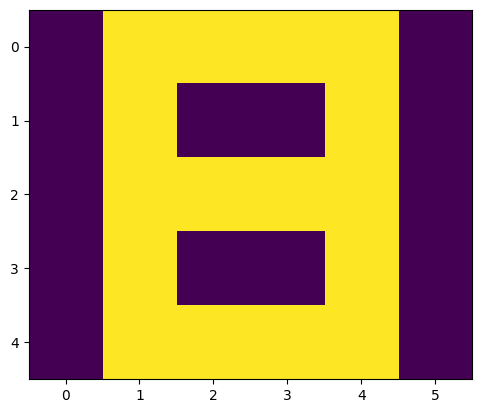

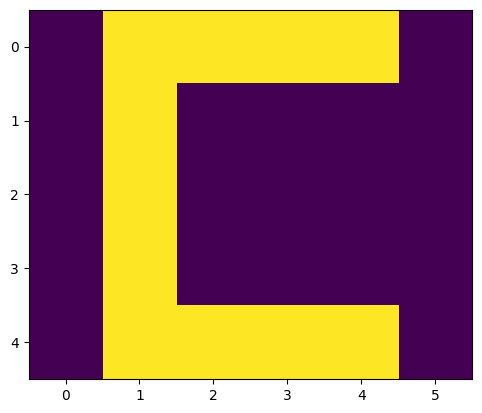

In [3]:
# Creating dataset
# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

# Converting to numpy arrays and reshaping
X = [np.array(a).reshape(1, -1),
     np.array(b).reshape(1, -1),
     np.array(c).reshape(1, -1)]
y = np.array(y)

# visualizing the data, plotting A, B, C
for i in X:
   plt.imshow(np.array(i).reshape(5, 6))
   plt.show()

**Step 3:** Define the required functions:  
(a) generate_wt: This is used to generate random weights for the nodes.  
(b) sigmoid: This is used as the activation function during the forward propagation of the neural network.  
(c) sigmoid_derivative: This is used to calculate derivative of sigmoid function, to update the weights during the backward propagation.  
(d) f_forward: This is used to apply forward propagation on the neural network. Output on the nodes are calculated using the random weights and the activation function.    
(e) back_prop: This is used to apply back propagation on the neural network. Weights are updated to minimize the errors on the nodes.  
(f) loss: This calculates mean squared error of the true and predicted values.  

In [4]:
# Function to generate random weights
# This initializes the weights for the neural network
def generate_wt(x, y):
	li =[]
	for i in range(x * y):
		li.append(np.random.randn())
	return(np.array(li).reshape(x, y))

# Defining activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Defining derivative of activation function
# This is used during backpropagation to adjust weights
def sigmoid_derivative(x):
    return x * (1 - x)

# Function to perform forward propagation
# This computes the output of the neural network given input data and weights
def f_forward(X, W1, W2):
    Z1 = np.dot(X, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    return A1, A2

# Function to perform backpropagation
# This updates the weights based on the error of the predictions
def back_prop(X, y, A1, A2, W1, W2, learning_rate=0.01):
    
	# error in output layer
    d2 =(A2-y)
    d1 = np.multiply((W2.dot((d2.transpose()))).transpose(), 
								(sigmoid_derivative(A1)))
	# Gradient for w1 and w2
    w1_adj = X.transpose().dot(d1)
    w2_adj = A1.transpose().dot(d2)
    
    # Update weights
    W1 -= learning_rate * w1_adj
    W2 -= learning_rate * w2_adj
    
    return W1, W2

# Function to calculate the loss
def loss(y_true, y_pred):
    # Mean Squared Error Loss
    return np.mean((y_true - y_pred) ** 2)

**Step 4:** Define the neural network architecture by defining number of input layer nodes, hidden layer nodes and output layer nodes. Then generate random weight for each node.

In [5]:
# Generating random weights for the neural network
input_size = X[0].shape[1]  # Number of features in input
output_size = y.shape[1]  # Number of classes

W1 = generate_wt(input_size, 10)  # Hidden layer with 10 neurons
W2 = generate_wt(10, output_size)  # Output layer

print("Initial Weights W1:\n", W1)
print("Initial Weights W2:\n", W2)

Initial Weights W1:
 [[ 2.28374530e+00 -7.48734769e-01 -7.70740185e-01  7.96829575e-01
  -6.88580983e-01 -1.44758540e+00 -7.56552706e-01 -8.70406154e-01
   1.09626708e-01  1.97229759e+00]
 [ 3.49839138e-01 -2.99601713e-02  1.41884961e+00 -8.09486564e-01
  -4.05317967e-01 -1.41980444e+00 -1.92106638e+00 -6.90034002e-01
  -4.94387663e-01 -7.17831996e-01]
 [-1.07943391e+00 -1.12266020e-01 -8.72839572e-01  1.37912907e+00
   1.34453514e+00  8.26608734e-01  1.96243132e-01 -1.02632166e+00
  -3.11971013e-02  3.77086304e-01]
 [ 8.01738324e-01 -2.83826612e-01 -1.42966084e-01 -3.62667308e-01
  -6.49507546e-01  2.92888307e-01  1.05443876e+00 -1.12166915e+00
  -2.22054568e-01 -5.31259667e-01]
 [-1.37872951e+00  3.83063863e-01 -1.00387331e+00  1.08060010e+00
  -1.85788299e-01  2.04007259e-01  1.09114380e+00  1.78580996e-01
   7.10535896e-01  6.57869752e-01]
 [ 4.24519943e-01  1.21556884e+00 -7.31549049e-01 -1.83415744e+00
  -5.36035452e-01  5.77143490e-01 -1.35167142e-02 -3.16842151e-01
   3.5124883

**Step 5:** Train the neural network using the defined functions. Following steps are applied for training:  
(i) Calculate the output of nodes from the forward propagation.  
(ii) Calculate loss from the output of the final node and the true value.  
(iii) Update the weights using backward propagation.  
(iv) Repeat the process for epochs number of times.  

In [6]:
# Function to train the neural network
# This function performs multiple epochs of training on the dataset
def train(X, y, W1, W2, epochs=1000, learning_rate=0.01):
    acc = []
    losses = []
    for epoch in range(epochs):
        l = []
        for i in range(len(X)):
            # Forward pass
            A1, A2 = f_forward(X[i], W1, W2)
            
            # Calculate loss
            current_loss = loss(y[i], A2)
            l.append(current_loss)
            
            # Backward pass
            W1, W2 = back_prop(X[i], y[i], A1, A2, W1, W2, learning_rate)
        
        accuracy = (1 - np.mean(l))*100  # Calculate accuracy as 1 - mean loss
        print(f'Epoch {epoch + 1}, Loss: {np.mean(l)}, Accuracy: {accuracy:.2f}%')
        acc.append(accuracy)
        losses.append(np.mean(l))
    
    return acc, losses, W1, W2

# Training the neural network
acc, losses, W1, W2 = train(X, y, W1, W2, epochs=100, learning_rate=0.1)

Epoch 1, Loss: 0.3858491035872338, Accuracy: 61.42%
Epoch 2, Loss: 0.3460644852971271, Accuracy: 65.39%
Epoch 3, Loss: 0.30739910812413945, Accuracy: 69.26%
Epoch 4, Loss: 0.27148591800146477, Accuracy: 72.85%
Epoch 5, Loss: 0.23989132571570781, Accuracy: 76.01%
Epoch 6, Loss: 0.21303058502590708, Accuracy: 78.70%
Epoch 7, Loss: 0.19041879335012835, Accuracy: 80.96%
Epoch 8, Loss: 0.17130396937409045, Accuracy: 82.87%
Epoch 9, Loss: 0.15496915080375473, Accuracy: 84.50%
Epoch 10, Loss: 0.14080350079365136, Accuracy: 85.92%
Epoch 11, Loss: 0.12830562924227992, Accuracy: 87.17%
Epoch 12, Loss: 0.11708101390368486, Accuracy: 88.29%
Epoch 13, Loss: 0.10685138344030658, Accuracy: 89.31%
Epoch 14, Loss: 0.09747320923323505, Accuracy: 90.25%
Epoch 15, Loss: 0.08893834175518302, Accuracy: 91.11%
Epoch 16, Loss: 0.08131923985442696, Accuracy: 91.87%
Epoch 17, Loss: 0.07466866083983986, Accuracy: 92.53%
Epoch 18, Loss: 0.06895072226064171, Accuracy: 93.10%
Epoch 19, Loss: 0.06405061320322464, Ac

**Step 6:** Plot the accuracy and loss over the range of epochs.  
**Insight:** Plot of loss shows gradual decrease in value over the range while vice versa for plot of accuracy.  

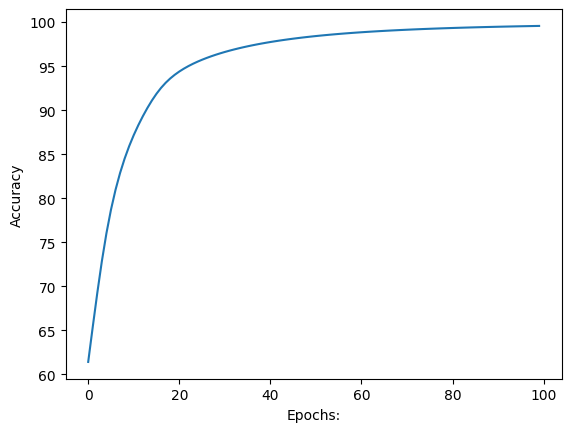

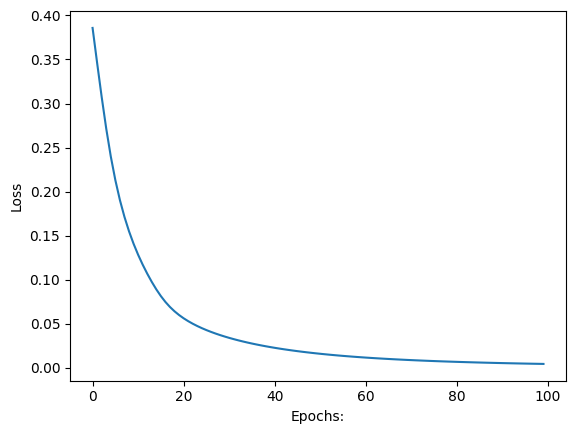

In [7]:
# plotting accuracy
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()

# plotting Loss
plt.plot(losses)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show() 

**Step 7:** We use the trained weights to predict letter class for the new input.  

Predicted: B


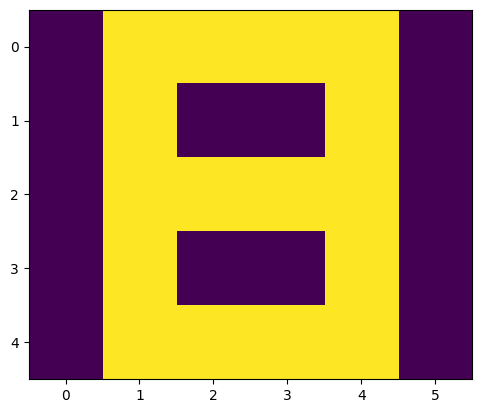

In [8]:
def predict(X, W1, W2):
    # Forward pass to get predictions
    _, A2 = f_forward(X, W1, W2)
    maxm = 0
    for i in range(len(A2[0])):
        if A2[0][i] > maxm:
            maxm = A2[0][i]
            index = i
    if index == 0:
        print("Predicted: A")
    elif index == 1:
        print("Predicted: B")
    elif index == 2:
        print("Predicted: C")
    plt.imshow(np.array(X).reshape(5, 6))
    plt.show()
predict(X[1], W1, W2)  
